In [1]:
#Several libraries are necessary for downloading
!pip install pycountry-convert
!pip install sktime[all_extras]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 55.4 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.1/229.1 kB 19.7 MB/s eta 0:00:00
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681833 sha256=b5c68a32ba2f8824c8eb3ec6c794566d65b0b0ecef2bc82a268dffaca1c4ac5c
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 61.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.7/118.7 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 87.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.5/645.5 kB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.1/8

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pycountry_convert as pc
import geopandas

In [3]:
df = pd.read_csv('/kaggle/input/global-data-on-sustainable-energy/global-data-on-sustainable-energy (1).csv')

# Exploting data

In [4]:
# Show first 10 rows of data
display(df.head(10))

# View descriptive characteristics of the word data
display(df.describe())

# View variable characteristics (number of null values, data names, data types)
print(df.info())

# View dataset size (number of rows/columns)
print('Shape of the DataFrame (rows/columns):', df.shape)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.20,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.20,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.20,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.50,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.90,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953
5,Afghanistan,2005,25.390894,12.20,7.51,9830000.0,33.88,0.34,0.0,0.59,...,252.06912,1.41,1549.999952,NaN,11.229715,242.031313,60,652230.0,33.93911,67.709953
6,Afghanistan,2006,30.718690,13.85,7.40,10620000.0,31.89,0.20,0.0,0.64,...,304.42090,1.50,1759.999990,NaN,5.357403,263.733602,60,652230.0,33.93911,67.709953
7,Afghanistan,2007,36.051010,15.30,7.25,15750000.0,28.78,0.20,0.0,0.75,...,354.27990,1.53,1769.999981,NaN,13.826320,359.693158,60,652230.0,33.93911,67.709953
8,Afghanistan,2008,42.400000,16.70,7.49,16170000.0,21.17,0.19,0.0,0.54,...,607.83350,1.94,3559.999943,NaN,3.924984,364.663542,60,652230.0,33.93911,67.709953
9,Afghanistan,2009,46.740050,18.40,7.50,9960000.0,16.53,0.16,0.0,0.78,...,975.04816,2.25,4880.000114,NaN,21.390528,437.268740,60,652230.0,33.93911,67.709953


,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
count,3649.000000,3639.000000,3480.000000,2718.000000,1.560000e+03,3455.000000,3628.000000,3523.000000,3628.000000,3607.000000,3649.000000,3442.000000,3.221000e+03,1512.000000,3332.000000,3367.000000,3.648000e+03,3648.000000,3648.000000
mean,2010.038367,78.933702,63.255287,113.137498,9.422400e+07,32.638165,70.365003,13.450190,23.968010,36.801182,25743.981745,5.307345,1.598665e+05,11.986707,3.441610,13283.774348,6.332135e+05,18.246388,14.822695
std,6.054228,30.275541,39.043658,244.167256,2.981544e+08,29.894901,348.051866,73.006623,104.431085,34.314884,34773.221366,3.532020,7.736611e+05,14.994644,5.686720,19709.866716,1.585519e+06,24.159232,66.348148
min,2000.000000,1.252269,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,1.000000e+01,0.000000,-62.075920,111.927225,2.100000e+01,-40.900557,-175.198242
25%,2005.000000,59.800890,23.175000,3.540000,2.600000e+05,6.515000,0.290000,0.000000,0.040000,2.877847,3116.737300,3.170000,2.020000e+03,2.137095,1.383302,1337.813437,2.571300e+04,3.202778,-11.779889
50%,2010.000000,98.361570,83.150000,32.910000,5.665000e+06,23.300000,2.970000,0.000000,1.470000,27.865068,13120.570000,4.300000,1.050000e+04,6.290766,3.559855,4578.633208,1.176000e+05,17.189877,19.145136
75%,2015.000000,100.000000,100.000000,112.210000,5.534750e+07,55.245000,26.837500,0.000000,9.600000,64.403792,33892.780000,6.027500,6.058000e+04,16.841638,5.830099,15768.615365,5.131200e+05,38.969719,46.199616
max,2020.000000,100.000000,100.000000,3060.190000,5.202310e+09,96.040000,5184.130000,809.410000,2184.940000,100.000010,262585.700000,32.570000,1.070722e+07,86.836586,123.139555,123514.196700,9.984670e+06,64.963051,178.065032


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

1. **Data types:**
        float64 = 18;
        int64 = 1;
        object = 2;
2. **Zero values are present**. 
3. **Data set format:** 3649 rows, 21 columns

In [5]:
# Check for duplicates
df.duplicated().sum()

0

In [6]:
# Search for zero values
df.isnull().sum()

Entity                                                                 0
Year                                                                   0
Access to electricity (% of population)                               10
Access to clean fuels for cooking                                    169
Renewable-electricity-generating-capacity-per-capita                 931
Financial flows to developing countries (US $)                      2089
Renewable energy share in the total final energy consumption (%)     194
Electricity from fossil fuels (TWh)                                   21
Electricity from nuclear (TWh)                                       126
Electricity from renewables (TWh)                                     21
Low-carbon electricity (% electricity)                                42
Primary energy consumption per capita (kWh/person)                     0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          207
Value_co2_emissions_kt_by_country                  

In [7]:
# Number of zero values in the dataset (in percent)
missing_values_df = df.isnull().sum() / df.shape[0] * 100.00
print(round(missing_values_df),2)

Entity                                                               0.0
Year                                                                 0.0
Access to electricity (% of population)                              0.0
Access to clean fuels for cooking                                    5.0
Renewable-electricity-generating-capacity-per-capita                26.0
Financial flows to developing countries (US $)                      57.0
Renewable energy share in the total final energy consumption (%)     5.0
Electricity from fossil fuels (TWh)                                  1.0
Electricity from nuclear (TWh)                                       3.0
Electricity from renewables (TWh)                                    1.0
Low-carbon electricity (% electricity)                               1.0
Primary energy consumption per capita (kWh/person)                   0.0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          6.0
Value_co2_emissions_kt_by_country                  

There are indicators with a rather **large** number of zero values:
1. Renewables (% equivalent to primary energy) - **59.0%**.
2. Financial flows to developing countries (US $) - **57.0%**.

Now, their cleaning can cause significant errors in the study, as more than 57% of the data will be removed.

In [8]:
## Creating a column 'Continent'

def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

df['Continent'] = df['Entity'].apply(country_to_continent)
df.head(10)

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude,Continent
0,Afghanistan,2000,1.613591,6.20,9.22,20000.0,44.99,0.16,0.0,0.31,...,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953,Asia
1,Afghanistan,2001,4.074574,7.20,8.86,130000.0,45.60,0.09,0.0,0.50,...,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953,Asia
2,Afghanistan,2002,9.409158,8.20,8.47,3950000.0,37.83,0.13,0.0,0.56,...,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953,Asia
3,Afghanistan,2003,14.738506,9.50,8.09,25970000.0,36.66,0.31,0.0,0.63,...,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953,Asia
4,Afghanistan,2004,20.064968,10.90,7.75,NaN,44.24,0.33,0.0,0.56,...,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953,Asia
5,Afghanistan,2005,25.390894,12.20,7.51,9830000.0,33.88,0.34,0.0,0.59,...,1.41,1549.999952,NaN,11.229715,242.031313,60,652230.0,33.93911,67.709953,Asia
6,Afghanistan,2006,30.718690,13.85,7.40,10620000.0,31.89,0.20,0.0,0.64,...,1.50,1759.999990,NaN,5.357403,263.733602,60,652230.0,33.93911,67.709953,Asia
7,Afghanistan,2007,36.051010,15.30,7.25,15750000.0,28.78,0.20,0.0,0.75,...,1.53,1769.999981,NaN,13.826320,359.693158,60,652230.0,33.93911,67.709953,Asia
8,Afghanistan,2008,42.400000,16.70,7.49,16170000.0,21.17,0.19,0.0,0.54,...,1.94,3559.999943,NaN,3.924984,364.663542,60,652230.0,33.93911,67.709953,Asia
9,Afghanistan,2009,46.740050,18.40,7.50,9960000.0,16.53,0.16,0.0,0.78,...,2.25,4880.000114,NaN,21.390528,437.268740,60,652230.0,33.93911,67.709953,Asia


# Exploring 'Energy Consumption' 

Since there are 176 unique Entities. I am going to group the data by geographic location.

In [9]:
# Creating an empty table df_energy_all with the necessary columns and data types
columns = ['Year', 'Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania']
df_energy_all = pd.DataFrame(columns=columns)

# Creating a function to automatically calculate the average value for the continent for the year
def filter_and_calculate_mean(df, year, column_name):
    row_data = {'Year': year}
    for continent in columns[1:]:
        filtered_df = df[(df['Year'] == year) & (df['Continent'] == continent)]
        mean_value = filtered_df[column_name].mean()
        row_data[continent] = mean_value
    return row_data

column_name = 'Primary energy consumption per capita (kWh/person)'
data_to_concat = []

for year in range(2000, 2021):
    row_data = filter_and_calculate_mean(df, year, column_name)
    data_to_concat.append(row_data)

# Putting it all together
df_energy_all = pd.concat([df_energy_all, pd.DataFrame(data_to_concat)], ignore_index=True)

df_energy_all['Year'] = df_energy_all['Year'].astype('int64')

# Displaying the df_energy_all table for review
display(df_energy_all)


,Year,Asia,Europe,Africa,North America,South America,Oceania
0,2000,32603.548770,44338.700471,4847.900957,27566.726344,13934.571591,20410.083500
1,2001,32578.960987,45077.597029,4927.979202,27755.850681,13594.028840,19753.279083
2,2002,33162.266291,45139.789114,5469.067622,28417.839719,13549.300650,19865.650267
3,2003,34514.456805,45684.361743,5504.370569,28567.084826,13544.852940,19749.410967
4,2004,36230.592382,46671.465343,5273.563727,29296.645961,13972.343900,19765.507192
5,2005,37451.074974,46636.735829,5585.993981,29737.698887,14138.375900,19710.961400
6,2006,36457.840863,46652.192029,5678.845593,30871.057922,14445.831080,19167.817408
7,2007,35493.393719,45862.498946,5522.412833,32065.740419,14902.684930,19324.754717
8,2008,35432.366691,46592.391405,5678.256258,31494.962770,15461.434940,19097.807625
9,2009,34366.110954,44063.963243,5791.133308,29676.628769,15278.057450,18727.961067


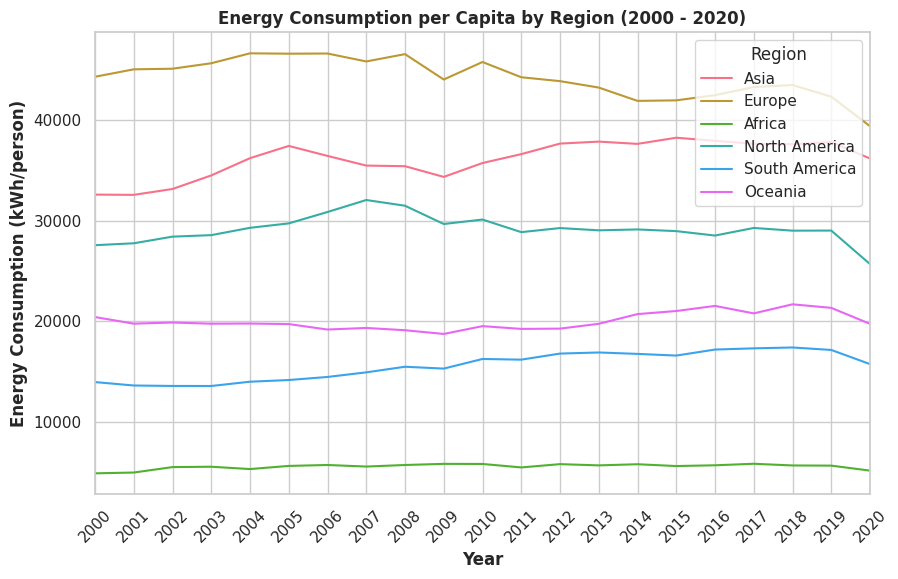

In [10]:
df_energy_cons_melted = pd.melt(df_energy_all, id_vars='Year', var_name='Region', value_name='Energy Consumption')

# Building a graph
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
palette = sns.color_palette("husl", len(df_energy_cons_melted['Region'].unique()))

plot = sns.lineplot(data=df_energy_cons_melted, x='Year', y='Energy Consumption', hue='Region', palette=palette)

# Adding names to the graph
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Energy Consumption (kWh/person)', fontweight='bold')
plt.title('Energy Consumption per Capita by Region (2000 - 2020)', fontweight='bold')
plt.legend(title='Region')
plt.margins(x=0)

# Adjust the placement of captions on the x-axis and change the date format
years = range(2000, 2021)
plot.set_xticks(years)
plot.set_xticklabels([str(year) for year in years], rotation=45)

plt.show()


The above graph clearly shows the trends in per capita egergy consumption by continent. The graphs are quite different from each other.

**Top continents in terms of energy consumption**:
1. Europe
2. Asia
3. North America
4. Oceania
5. South America
6. Oceania

The graph shows that energy consumption per capita in Oceania and Africa remained almost unchanged between 2000 and 2020. In addition, it is noticeable that from 2019 to 2020, all graphs begin to fall, so energy consumption per capita has generally decreased for all continents.

It is worth emphasizing that the lowest rates in *Africa* can be explained by the overall low level of industrialization and rather low living standards of the population in general, respectively, the availability of goods, and energy is such a good, is rather limited. *Europe, in turn, has the highest rates, which is quite expected, however, it can be seen that since 2008 the amount of energy consumption per capita has been gradually decreasing, while the countries of *Asia* have moderately increasing rates, and perhaps soon they will have the highest rates, thereby overtaking the countries of *Europe*

**It will be useful to look at the situation with energy consumption by country for 2020, as this data is the closest to the present day.**

### 1.1 Top 20 Asian countries by energy consumption per capita as of 2020

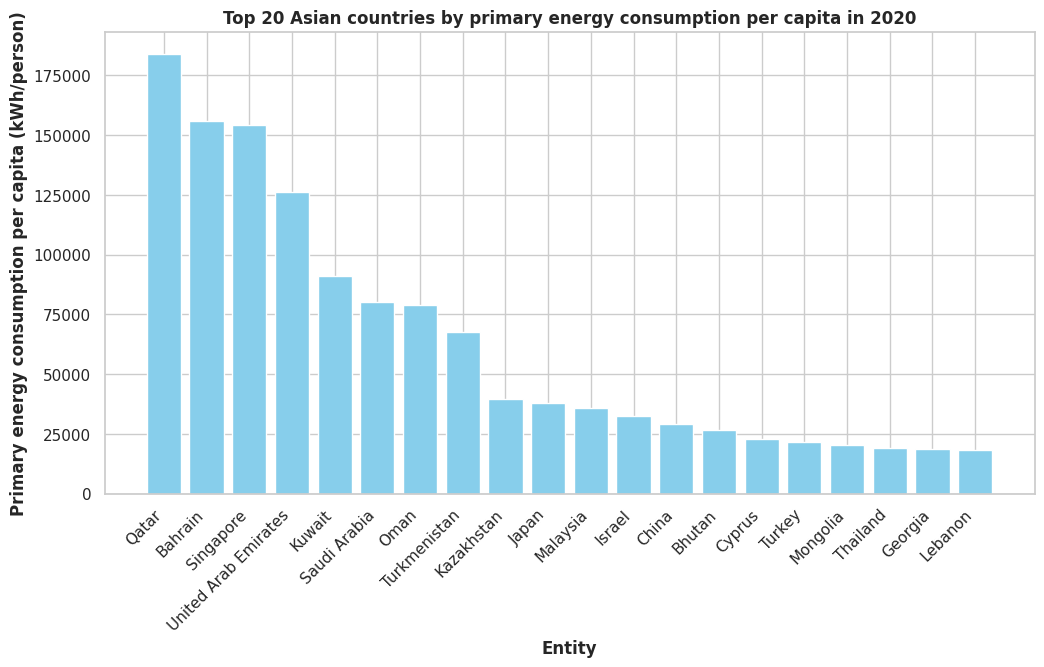

In [11]:
# Sorting data by relevant parameters (year, continent, and consumption volumes)
df_filtered_asia = df[(df['Continent'] == 'Asia') & (df['Year'] == 2020)]
df_sorted_asia = df_filtered_asia.sort_values(by='Primary energy consumption per capita (kWh/person)', ascending=False)

# Formation of the top 20
top_20_аsia = df_sorted_asia.head(20)

# Building a graph
plt.figure(figsize=(12, 6))
plt.bar(top_20_аsia['Entity'], top_20_аsia['Primary energy consumption per capita (kWh/person)'], color='skyblue')
plt.xlabel('Entity', fontweight  = 'bold')
plt.ylabel('Primary energy consumption per capita (kWh/person)', fontweight  = 'bold')
plt.title('Top 20 Asian countries by primary energy consumption per capita in 2020', fontweight  = 'bold', loc='center')
plt.xticks(rotation=45, ha='right')  
plt.show()

### 1.2 Top 20 European countries by energy consumption per capita as of 2020

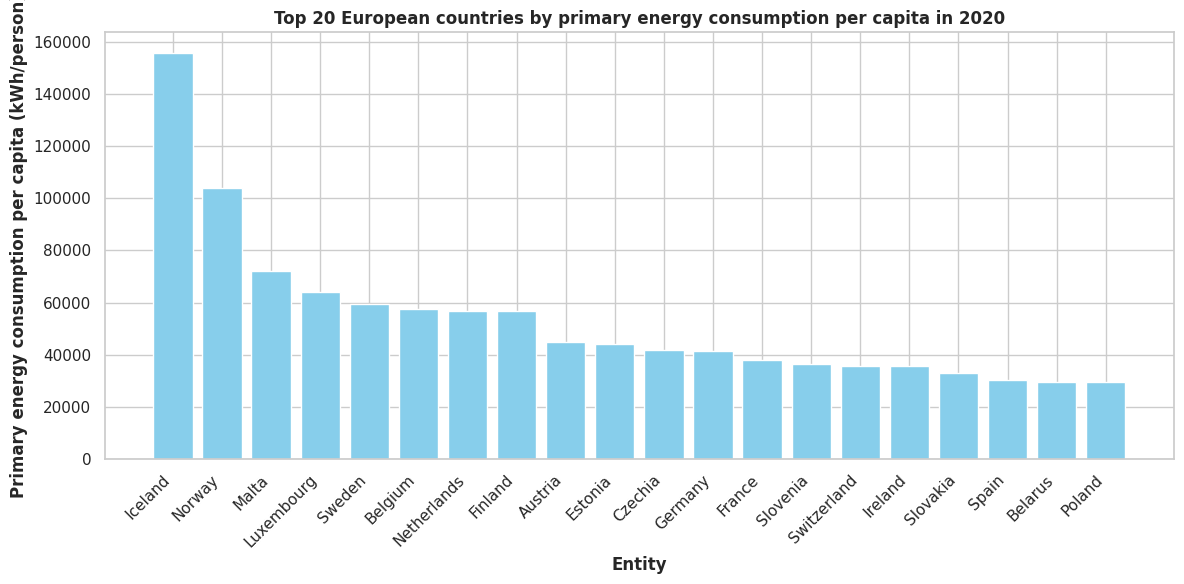

In [12]:
# Sorting data by relevant parameters (year, continent, and consumption volumes)
df_filtered_europe = df[(df['Continent'] == 'Europe') & (df['Year'] == 2020)]
df_sorted_europe = df_filtered_europe.sort_values(by='Primary energy consumption per capita (kWh/person)', ascending=False)

# Formation of the top 20
top_20_europe = df_sorted_europe.head(20)

# Building a graph
plt.figure(figsize=(12, 6))
plt.bar(top_20_europe['Entity'], top_20_europe['Primary energy consumption per capita (kWh/person)'], color='skyblue')
plt.xlabel('Entity', fontweight  = 'bold')
plt.ylabel('Primary energy consumption per capita (kWh/person)', fontweight  = 'bold')
plt.title('Top 20 European countries by primary energy consumption per capita in 2020', fontweight  = 'bold', loc='center')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

 ### 1.3 Top 20 African countries by energy consumption per capita as of 2020

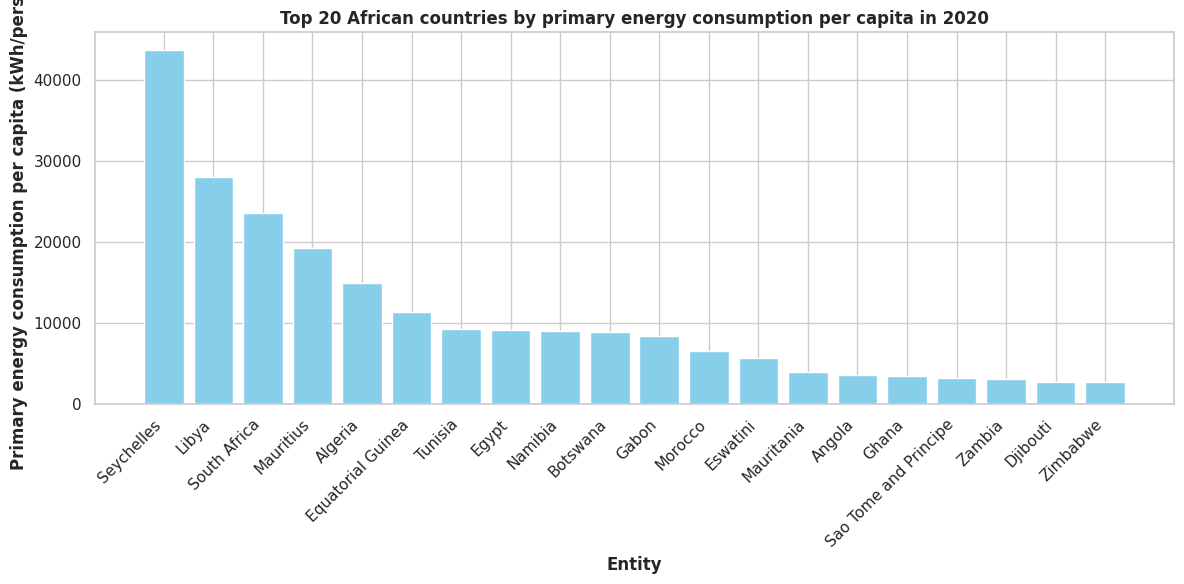

In [13]:
# Sorting data by relevant parameters (year, continent, and consumption volumes)
df_filtered_africa = df[(df['Continent'] == 'Africa') & (df['Year'] == 2020)]
df_sorted_africa = df_filtered_africa.sort_values(by='Primary energy consumption per capita (kWh/person)', ascending=False)

# Formation of the top 20
top_20_africa = df_sorted_africa.head(20)

# Building a graph
plt.figure(figsize=(12, 6))
plt.bar(top_20_africa['Entity'], top_20_africa['Primary energy consumption per capita (kWh/person)'], color='skyblue')
plt.xlabel('Entity', fontweight  = 'bold')
plt.ylabel('Primary energy consumption per capita (kWh/person)', fontweight  = 'bold')
plt.title('Top 20 African countries by primary energy consumption per capita in 2020', fontweight  = 'bold', loc='center')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

 ### 1.4 Top 20 North American countries by energy consumption per capita as of 2020

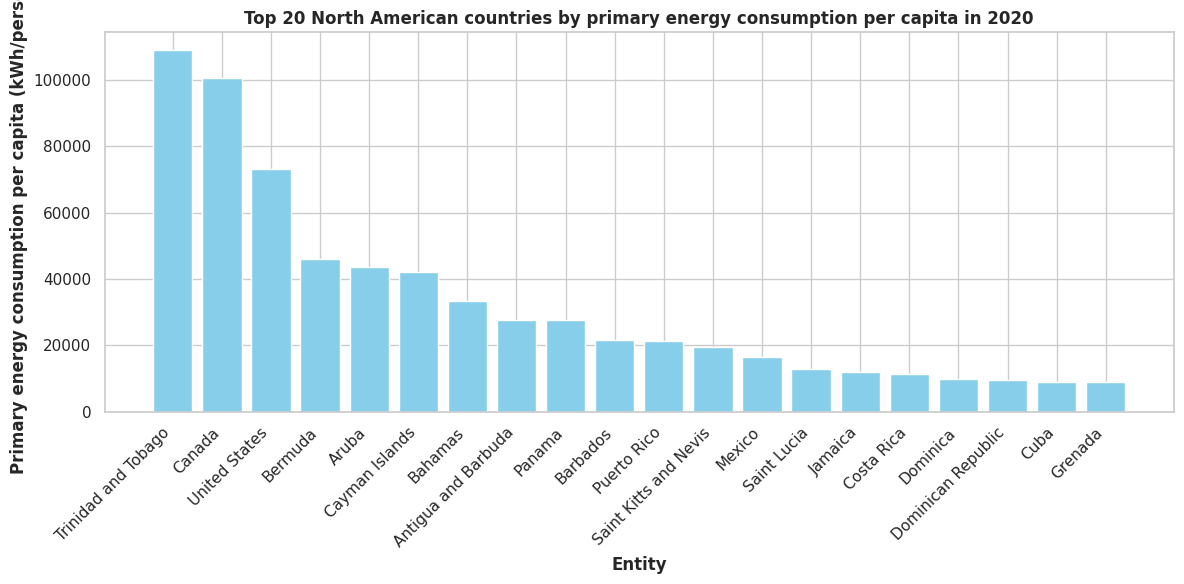

In [14]:
# Sorting data by relevant parameters (year, continent, and consumption volumes)
df_filtered_nam = df[(df['Continent'] == 'North America') & (df['Year'] == 2020)]
df_sorted_nam = df_filtered_nam.sort_values(by='Primary energy consumption per capita (kWh/person)', ascending=False)

# Formation of the top 20
top_20_nam = df_sorted_nam.head(20)

# Building a graph
plt.figure(figsize=(12, 6))
plt.bar(top_20_nam['Entity'], top_20_nam['Primary energy consumption per capita (kWh/person)'], color='skyblue')
plt.xlabel('Entity', fontweight  = 'bold')
plt.ylabel('Primary energy consumption per capita (kWh/person)', fontweight  = 'bold')
plt.title('Top 20 North American countries by primary energy consumption per capita in 2020', fontweight  = 'bold', loc='center')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

 ### 1.5 Top 20 South American countries by energy consumption per capita as of 2020

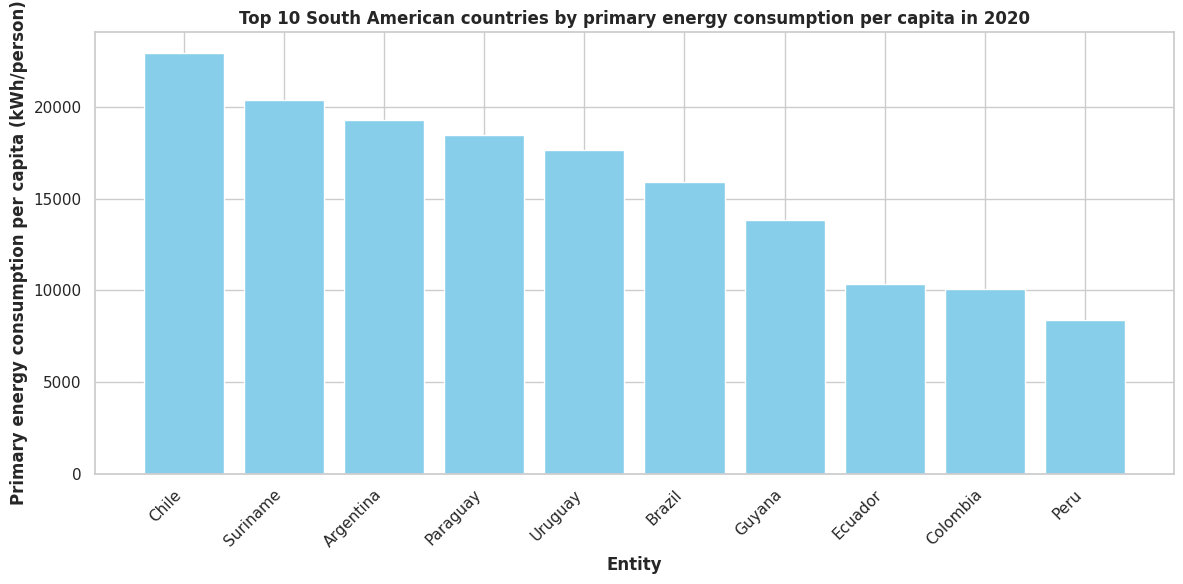

In [15]:
# Sorting data by relevant parameters (year, continent, and consumption volumes)
df_filtered_sam = df[(df['Continent'] == 'South America') & (df['Year'] == 2020)]
df_sorted_sam = df_filtered_sam.sort_values(by='Primary energy consumption per capita (kWh/person)', ascending=False)

# Formation of the top 20
top_20_sam = df_sorted_sam.head(10)

# Building a graph
plt.figure(figsize=(12, 6))
plt.bar(top_20_sam['Entity'], top_20_sam['Primary energy consumption per capita (kWh/person)'], color='skyblue')
plt.xlabel('Entity', fontweight  = 'bold')
plt.ylabel('Primary energy consumption per capita (kWh/person)', fontweight  = 'bold')
plt.title('Top 10 South American countries by primary energy consumption per capita in 2020', fontweight  = 'bold', loc='center')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

 ### 1.6 Top 10 Oceania countries by energy consumption per capita as of 2020

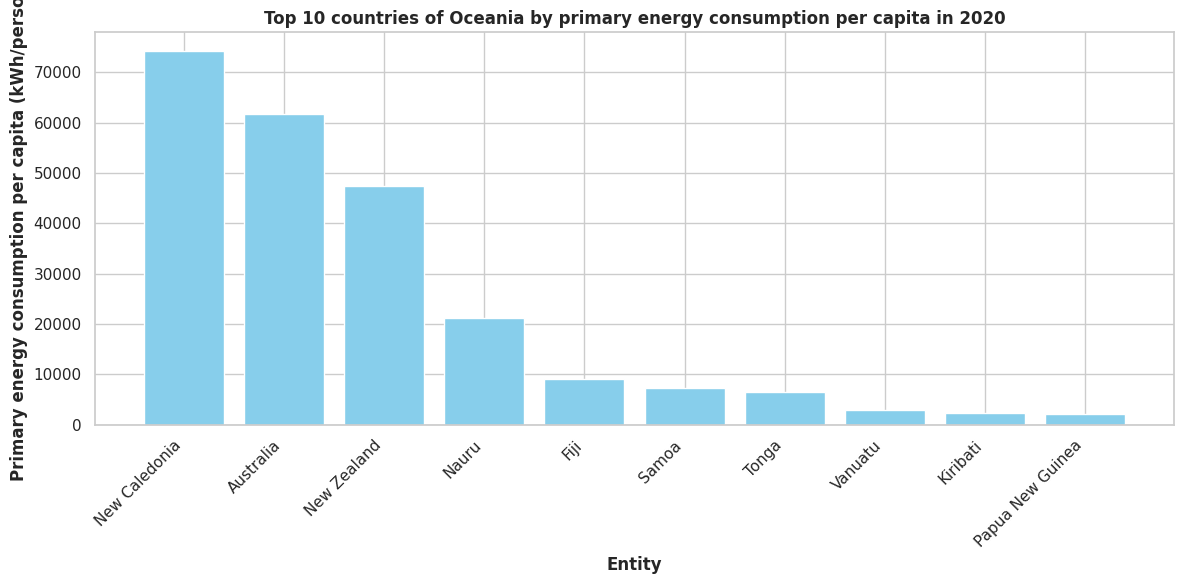

In [16]:
# Sorting data by relevant parameters (year, continent, and consumption volumes)
df_filtered_oceania = df[(df['Continent'] == 'Oceania') & (df['Year'] == 2020)]
df_sorted_oceania = df_filtered_oceania.sort_values(by='Primary energy consumption per capita (kWh/person)', ascending=False)

# Formation of the top 20
top_20_oceania = df_sorted_oceania.head(10)

# Building a graph
plt.figure(figsize=(12, 6))
plt.bar(top_20_oceania['Entity'], top_20_oceania['Primary energy consumption per capita (kWh/person)'], color='skyblue')
plt.xlabel('Entity', fontweight  = 'bold')
plt.ylabel('Primary energy consumption per capita (kWh/person)', fontweight  = 'bold')
plt.title('Top 10 сountries of Oceania by primary energy consumption per capita in 2020', fontweight  = 'bold', loc='center')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

### Conclusions

1. Among Asian countries, Qatar, Bahrain, Singapore, and the United Arab Emirates have the highest scores. This can be explained, if it is appropriate to say so, by the disproportion of the country's energy resources and the number of its inhabitants. In addition, these countries are very developed in terms of economy and infrastructure. They have a high level of industrialization, technological progress and a high standard of living. In addition, Qatar and the United Arab Emirates have significant deposits of natural fuel resources (gas and oil fields), which may also explain their leading positions to some extent.
2. The countries of South America and Africa have the lowest scores among all. This can be explained by poor infrastructure development and limited natural resources. In addition to this, low economic development goes hand in hand with a high level of crime, which further aggravates the current situation within the countries and complicates the processes of creating and consuming public goods.
3. The countries of Oceania cannot be reduced to a common feature. After all, the difference in energy consumption per capita varies from country to country. For example, New Caledonia, Australia and New Zealand have the highest rates among Oceania, but after the 3rd place (New Zealand), the rates decrease almost twice and tend to fall rapidly. 
4. In general, among the European countries (which, for the most part, do not have significant deposits of natural resources), it can be argued that everything is based on economic ties and international cooperation. Energy imports are commonplace among European countries. In addition, well-developed infrastructure and high concentration of capital make it possible to almost offset the problems associated with limited energy reserves.

# Carbon Emission Forecasting

In [17]:
# Creating an empty table df_energy_all with the necessary columns and data types
columns = ['Year', 'Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania']
df_energy_CO2_emission = pd.DataFrame(columns=columns)
df_energy_CO2_emission = df_energy_CO2_emission.dropna()


# Create a function to automatically calculate the average value for the continent for the year
def filter_and_calculate_mean(df, year, column_name):
    row_data = {'Year': year}
    for continent in columns[1:]:
        filtered_df = df[(df['Year'] == year) & (df['Continent'] == continent)]
        mean_value = filtered_df[column_name].mean()
        row_data[continent] = mean_value
    return row_data

column_name = 'Value_co2_emissions_kt_by_country'
data_to_concat = []

for year in range(2000, 2021):
    row_data = filter_and_calculate_mean(df, year, column_name)
    data_to_concat.append(row_data)

# Putting it all together
df_energy_CO2_emission = pd.concat([df_energy_CO2_emission, pd.DataFrame(data_to_concat)], ignore_index=True)

df_energy_CO2_emission['Year'] = df_energy_CO2_emission['Year'].astype('int64')

# Displaying the df_energy_all table for review
df_energy_CO2_emission = df_energy_CO2_emission.dropna()
df_energy_CO2_emission.head(21)

,Year,Asia,Europe,Africa,North America,South America,Oceania
0,2000,201805.277778,126603.235294,14348.695652,308078.301773,61750.000000,31290.266917
1,2001,208948.333333,128810.294118,15378.695652,306658.317091,61452.000000,32024.042083
2,2002,220658.891107,128217.351961,15595.000153,300865.897428,60407.001020,32712.128992
3,2003,240787.781329,132186.175913,16477.826032,305745.388252,60788.000222,32884.936418
4,2004,265491.106977,131827.942219,17234.782442,309414.243751,65088.999582,34035.852299
5,2005,288241.661496,130847.646169,17568.695672,311778.512554,66309.000894,34521.965469
6,2006,309791.950158,131542.645043,17732.826098,307951.550613,67946.998846,34960.908740
7,2007,332571.113818,124481.110461,18092.826034,313789.327207,71615.999588,35763.716803
8,2008,343014.725130,121700.278390,19226.304164,304571.842211,75373.999892,36044.799568
9,2009,359063.883047,111889.999684,18916.304554,284591.068688,72502.000103,36358.495319


In [18]:
# Some odd moves 
Co2_emission = df_energy_CO2_emission
Co2_emission.head(10)

,Year,Asia,Europe,Africa,North America,South America,Oceania
0,2000,201805.277778,126603.235294,14348.695652,308078.301773,61750.000000,31290.266917
1,2001,208948.333333,128810.294118,15378.695652,306658.317091,61452.000000,32024.042083
2,2002,220658.891107,128217.351961,15595.000153,300865.897428,60407.001020,32712.128992
3,2003,240787.781329,132186.175913,16477.826032,305745.388252,60788.000222,32884.936418
4,2004,265491.106977,131827.942219,17234.782442,309414.243751,65088.999582,34035.852299
5,2005,288241.661496,130847.646169,17568.695672,311778.512554,66309.000894,34521.965469
6,2006,309791.950158,131542.645043,17732.826098,307951.550613,67946.998846,34960.908740
7,2007,332571.113818,124481.110461,18092.826034,313789.327207,71615.999588,35763.716803
8,2008,343014.725130,121700.278390,19226.304164,304571.842211,75373.999892,36044.799568
9,2009,359063.883047,111889.999684,18916.304554,284591.068688,72502.000103,36358.495319


In [19]:
# replacing indexes by 'Year' column in datetime64 format
Co2_emission['Year'] = pd.to_datetime(Co2_emission['Year'], format='%Y')
Co2_emission.set_index('Year', inplace=True)

In [20]:
#defining forecast DataFrame
forecast_df = Co2_emission.resample('Y').mean()

In [21]:
# importing some necessary packages
from sktime.forecasting.base import ForecastingHorizon
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sktime.performance_metrics.forecasting import mean_squared_error
from sktime.forecasting.arima import AutoARIMA

In [22]:
#defining function to calculate scores
def calculate_scores(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return mae, mse, rmse

# forecasting and visualization
def sktime_forecast(dataset, horizon, forecaster, validation=False, confidence=0.90, frequency="Y"):
    
    # Adjusting frequency and interpolate missing values
    forecast_df = dataset.resample(rule=frequency).sum()
    forecast_df = forecast_df.interpolate(method="time")

    for col in dataset.columns:
        if validation:
            # Validation scenario
            df = forecast_df[col]

            y_train = df[:-horizon]
            y_test = df.tail(horizon)

            forecaster.fit(y_train)
            fh = ForecastingHorizon(y_test.index, is_relative=False)
            y_pred = forecaster.predict(fh)
            ci = forecaster.predict_interval(fh, coverage=confidence).astype("float")
            y_true = df.tail(horizon)

            mae, mse, rmse = calculate_scores(y_true, y_pred)
        else:
            # Non-validation scenario
            df = forecast_df[col].dropna()
            forecaster.fit(df)

            last_date = df.index.max()
            fh = ForecastingHorizon(
                pd.date_range(str(last_date), periods=horizon, freq=frequency),
                is_relative=False,
            )

            y_pred = forecaster.predict(fh)
            ci = forecaster.predict_interval(fh, coverage=confidence).astype("float")
            
            if not np.isnan(y_pred).any():
                y_true = df.tail(horizon)
                mae, mse, rmse = calculate_scores(y_true, y_pred)
            else:
                mae, mse, rmse = np.nan, np.nan, np.nan

        # Plot and display results
        plt.plot(
            df.tail(horizon * 3),
            label="Actual",
            color="black",
        )
        plt.gca().fill_between(
            ci.index, (ci.iloc[:, 0]), (ci.iloc[:, 1]), color="b", alpha=0.1
        )
        plt.plot(y_pred, label="Predicted")
        plt.title( f"{horizon} years forecast for {col}, confidence: {confidence*100}%)")
        plt.ylim(bottom=0)
        plt.legend()
        plt.grid(True)
        plt.show()

        # Display scores
        print(f"Column Name: {col}")
        print(f"Actual Values: {y_true.to_numpy()}")
        print(f"Predicted Values: {y_pred.to_numpy()}")
        print(f"Confidence Interval: {ci.to_numpy()}")
        print(f"Mean Absolute Error (MAE): {mae}")
        print(f"Mean Squared Error (MSE): {mse}")
        print(f"Root Mean Squared Error (RMSE): {rmse}")
        print(f"Confidence Level: {confidence}\n")


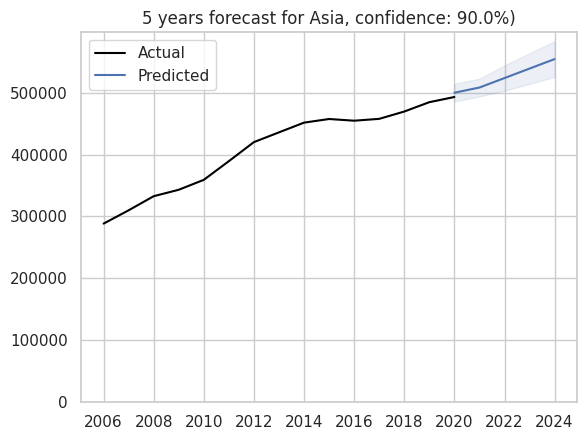

Column Name: Asia
Actual Values: [454687.48764941 457688.61630645 469512.49106613 484632.48990239
 493007.49410722]
Predicted Values: [499958.92234078 508333.92654561 523660.35898401 538986.7914224
 554313.22386079]
Confidence Interval: [[485564.95364087 514352.89104069]
 [493939.9578457  522727.89524553]
 [503304.21323222 544016.5047358 ]
 [514055.70631159 563917.8765332 ]
 [525525.28646096 583101.16126062]]
Mean Absolute Error (MAE): 53144.92882439713
Mean Squared Error (MSE): 2851844888.5266714
Root Mean Squared Error (RMSE): 53402.66742894657
Confidence Level: 0.9



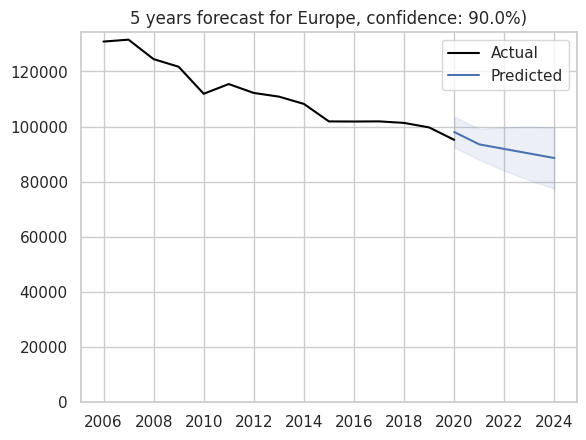

Column Name: Europe
Actual Values: [101808.60992372 101859.72240417 101303.88899175  99660.83429811
  95159.44463878]
Predicted Values: [98005.89794783 93504.5082885  91849.57193822 90194.63558793
 88539.69923765]
Confidence Interval: [[ 92412.25848046 103599.5374152 ]
 [ 87910.86882113  99098.14775587]
 [ 83938.97114043  99760.172736  ]
 [ 80506.16783123  99883.10334464]
 [ 77352.42030291  99726.97817239]]
Mean Absolute Error (MAE): 7539.637451279414
Mean Squared Error (MSE): 61416855.88705699
Root Mean Squared Error (RMSE): 7836.890702763245
Confidence Level: 0.9



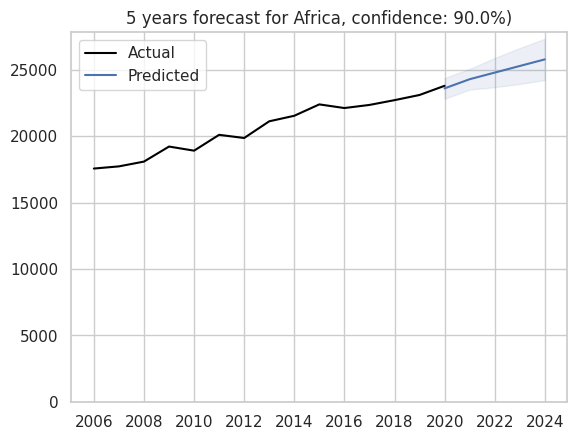

Column Name: Africa
Actual Values: [22127.02134412 22360.85152414 22720.63805063 23110.8509793
 23801.0642264 ]
Predicted Values: [23608.34406215 24298.55730925 24796.05039211 25293.54347496
 25791.03655781]
Confidence Interval: [[22828.85039736 24387.83772694]
 [23519.06364446 25078.05097404]
 [23693.67987957 25898.42090464]
 [23943.42084336 26643.66610656]
 [24232.04922823 27350.0238874 ]]
Mean Absolute Error (MAE): 1933.42113433899
Mean Squared Error (MSE): 3796098.700433966
Root Mean Squared Error (RMSE): 1948.3579497705152
Confidence Level: 0.9



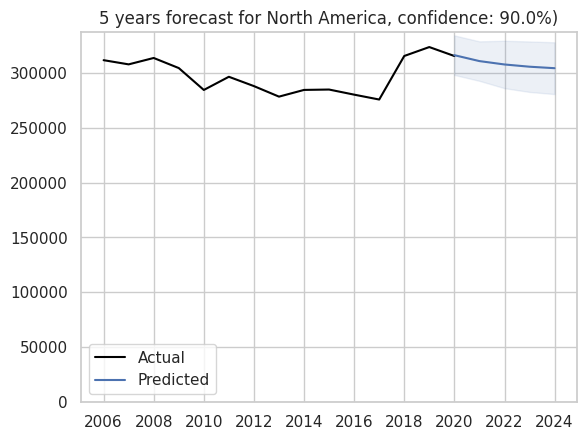

Column Name: North America
Actual Values: [280328.32548171 275861.02427385 315604.21682854 323750.53117433
 315594.74872634]
Predicted Values: [316350.00584163 310944.12885254 307861.57005194 305818.36527129
 304464.07292986]
Confidence Interval: [[298320.71728755 334379.29439571]
 [292914.84029846 328973.41740662]
 [286231.3800745  329491.76002938]
 [282783.45150303 328853.27903955]
 [280838.40043369 328089.74542602]]
Mean Absolute Error (MAE): 21582.05468294809
Mean Squared Error (MSE): 606757755.9199897
Root Mean Squared Error (RMSE): 24632.45330696863
Confidence Level: 0.9



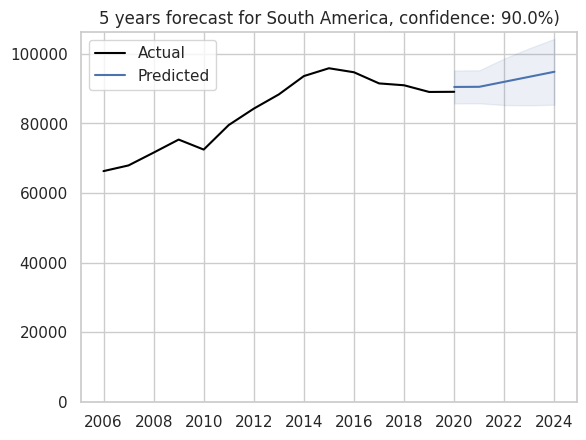

Column Name: South America
Actual Values: [94723.0005525 91520.9990326 90981.9995104 89062.9980771 89104.9998299]
Predicted Values: [90502.73491025 90544.73666305 91984.47349621 93424.21032936
 94863.94716251]
Confidence Interval: [[ 85766.73433597  95238.73548453]
 [ 85808.73608877  95280.73723733]
 [ 85286.75725265  98682.18973976]
 [ 85221.21671003 101627.20394868]
 [ 85391.94601395 104335.94831107]]
Mean Absolute Error (MAE): 3263.832316493694
Mean Squared Error (MSE): 14390866.217314173
Root Mean Squared Error (RMSE): 3793.5295197631153
Confidence Level: 0.9



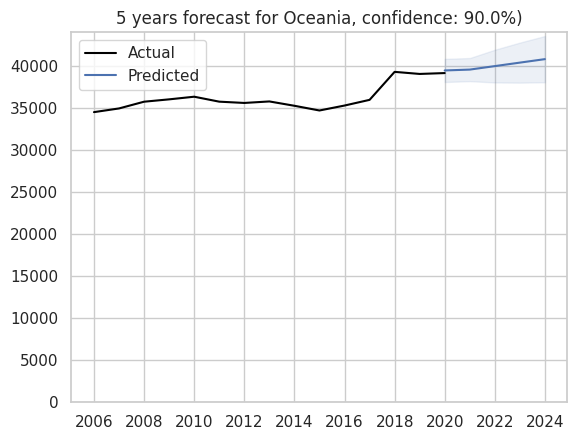

Column Name: Oceania
Actual Values: [35305.20156633 35984.84513301 39320.90946628 39072.72798598
 39176.36336882]
Predicted Values: [39487.78569399 39591.42107683 40006.47878484 40421.53649284
 40836.59420085]
Confidence Interval: [[38109.61022742 40865.96116057]
 [38213.24561025 40969.5965434 ]
 [38057.44434867 41955.513221  ]
 [38034.46656299 42808.6064227 ]
 [38080.2432677  43592.945134  ]]
Mean Absolute Error (MAE): 2296.7537457850704
Mean Squared Error (MSE): 7109411.223562387
Root Mean Squared Error (RMSE): 2666.3479187012313
Confidence Level: 0.9



In [23]:
# Foecasting by AutoARIMA
forecaster = AutoARIMA(sp=1, suppress_warnings=True)
sktime_forecast(dataset=Co2_emission, horizon=5, forecaster=forecaster, validation=False)


Analysis for **Asia**:
* High MAE and RMSE (53,144.93 and 53,402.67, respectively).
* Wide confidence intervals, indicating significant uncertainty.
* Model predictions have relatively large errors.

Analysis for **Europe**:
* Moderate MAE and RMSE (7,539.64 and 7,836.89, respectively).
* Narrow confidence intervals, which indicates high reliability of the forecast.
* The model provides relatively accurate forecasts for European data.

Analysis for **Africa**:
* Low MAE and RMSE (1.933.42 and 1.948.36, respectively).
* Narrow confidence intervals, which indicates high reliability of the forecast.
* The model performs well with low forecast errors in the African region.

Analysis for **North America**:
* Moderate MAE and RMSE (21,582.05 and 24,632.45, respectively).
* Wide confidence intervals, indicating some uncertainty in the forecast.
* Model accuracy is moderate, with room for improvement.

Analysis for **South America**:
* Low MAE and RMSE values (3,263.83 and 3,793.53, respectively).
* Narrow confidence intervals, which indicates high reliability of the forecast.
* The model provides accurate forecasts with low errors in South America.

Analysis for **Oceania**:
* Low MAE and RMSE (2,296.75 and 2,666.35, respectively).
* Narrow confidence intervals, which indicates high reliability of the forecast.
* The model performs well with low forecast errors in Oceania.

**Overall conclusion**

Overall, the models for Europe, Africa, South America, and Oceania perform relatively well with smaller errors and higher forecast confidence. In contrast, the models for Asia and North America have higher errors and wider confidence intervals, indicating that there is room for improvement in accuracy and reliability.

*This model is not bad, but requires more research to obtain more accurate results.*

In [24]:
#Search for possible improvements 
correlation_matrix = df.corr(numeric_only = True)
correlation_matrix['Value_co2_emissions_kt_by_country'].sort_values(ascending = False)

Value_co2_emissions_kt_by_country                                   1.000000
Electricity from fossil fuels (TWh)                                 0.989741
Electricity from renewables (TWh)                                   0.856270
Land Area(Km2)                                                      0.653732
Electricity from nuclear (TWh)                                      0.598495
Access to electricity (% of population)                             0.126988
Financial flows to developing countries (US $)                      0.126609
Latitude                                                            0.115571
gdp_per_capita                                                      0.098209
Primary energy consumption per capita (kWh/person)                  0.095683
Access to clean fuels for cooking                                   0.095629
Renewable-electricity-generating-capacity-per-capita                0.046755
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0.039128

As can be seen, CO2 emissions are quite strongly correlated with **Electricity from fossil fuels (TWh)** and **Electricity from renewables (TWh)**. 

*These indicators can help in a possible in-depth analysis.*

***This analysis will be continued in the future, supplemented by new research***